In [1]:
import pandas as pd

train_x = pd.read_csv('/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/train_x.csv')
train_y = pd.read_csv('/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/train_y.csv')
test_x = pd.read_csv('/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/test_x.csv')
test_y = pd.read_csv('/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/test_y.csv')

In [9]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

x = train_x.to_numpy()
y = train_y.to_numpy().ravel()
testX = test_x.to_numpy()
testY = test_y.to_numpy().ravel()

In [9]:
# svm_clf = SVC(kernel="linear", C=1.0, cache_size=5000)
# svm_clf.fit(x, y)
# life-time to run, the threshold is 10,000 data

TypeError: __init__() got an unexpected keyword argument 'loss'

In [3]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(x, y)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

In [7]:
result = clf.predict(testX)

In [8]:
from sklearn.metrics import mean_squared_error

mean_squared_error(result, testY)

0.07117449126742509

In [10]:
from sklearn.svm import LinearSVC

Linear_clf = LinearSVC(C=1, random_state=42)
Linear_clf.fit(x, y)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, random_state=42)

In [11]:
result = Linear_clf.predict(testX)
mean_squared_error(result, testY)

0.14391924371094375

In [13]:
Linear_clf = LinearSVC(C=10, random_state=42)
Linear_clf.fit(x, y)
result = Linear_clf.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.0669443999359077

In [14]:
Linear_clf = LinearSVC(C=50, random_state=42)
Linear_clf.fit(x, y)
result = Linear_clf.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.06684826149655504

In [9]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5, C = 10, random_state=42)
svm_reg.fit(x, y)
result = svm_reg.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.48873885365586245

In [10]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 
df

,0,y,groundTrue
0,2.534108,0.795139,0
1,2.651020,0.978527,0
2,5.052232,0.857380,0
3,7.577836,1.012893,1
4,2.526006,0.771331,0
...,...,...,...
31200,-7.438056,0.775164,0
31201,-7.388507,0.814696,0
31202,5.107692,0.843991,0
31203,2.547342,0.766515,0


/tmp/ipykernel_31821/774928199.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='0', ylabel='y'>

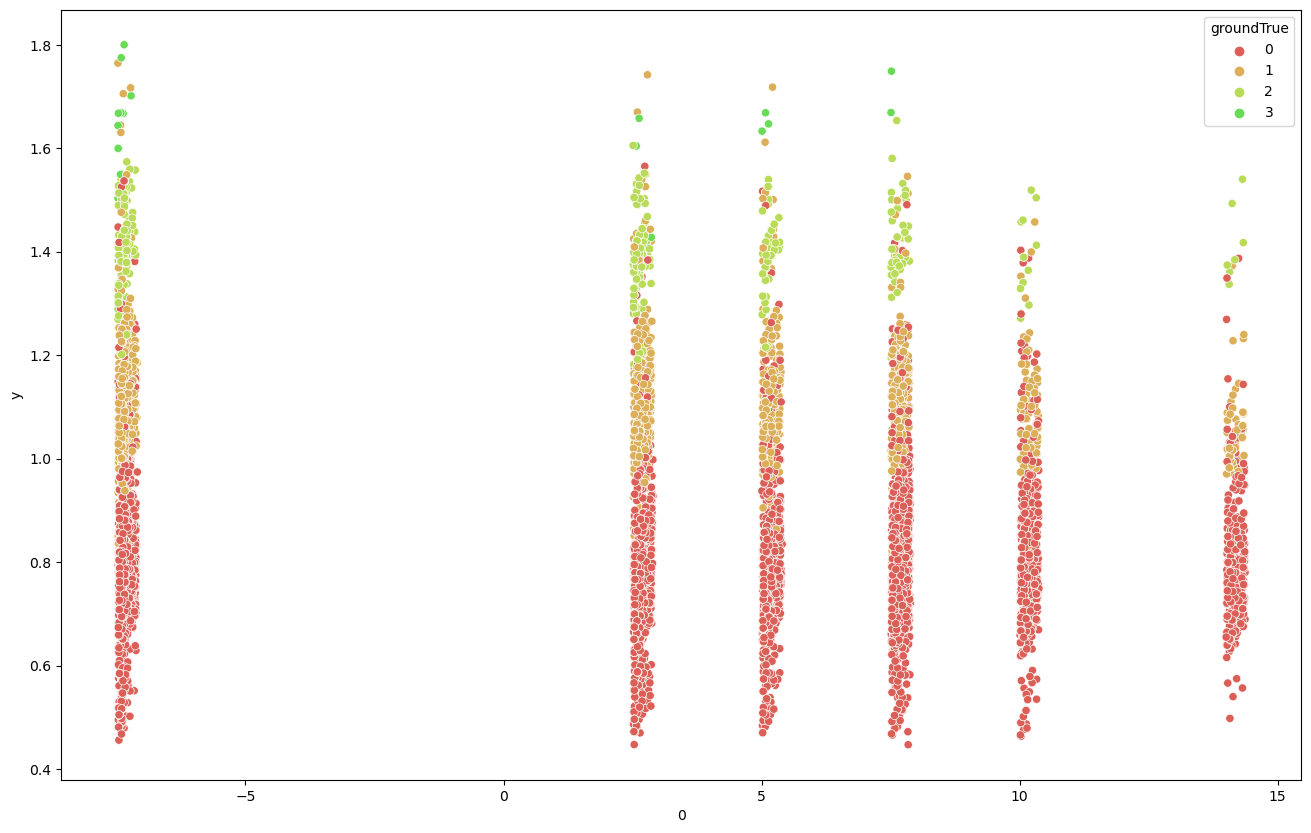

In [11]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [13]:
svm_reg = LinearSVR(epsilon=1, C = 10, random_state=42)
svm_reg.fit(x, y)
result = svm_reg.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.24971689446061088

In [16]:
svm_reg = LinearSVR(epsilon=0.5, C = 10, random_state=42)
svm_reg.fit(x, y)
result = svm_reg.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.21980056700977738

In [17]:
svm_reg = LinearSVR(epsilon=0.1, C = 10, random_state=42)
svm_reg.fit(x, y)
result = svm_reg.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.04927009987459537

In [3]:
svm_reg = LinearSVR(epsilon=0, C = 10, random_state=42)
svm_reg.fit(x, y)
result = svm_reg.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.041227342159794095

In [11]:
hard_result = np.round(result)

print(classification_report(testY, hard_result))


              precision    recall  f1-score   support

           0       1.00      0.95      0.98     23569
           1       0.86      0.98      0.92      6725
           2       0.79      0.98      0.88       884
           3       0.59      0.70      0.64        27

    accuracy                           0.96     31205
   macro avg       0.81      0.90      0.85     31205
weighted avg       0.96      0.96      0.96     31205



In [13]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 
df

,0,y,groundTrue
0,2.534108,0.003223,0
1,2.651020,-0.010075,0
2,5.052232,-0.009429,0
3,7.577836,0.872148,1
4,2.526006,0.000198,0
...,...,...,...
31200,-7.438056,0.024524,0
31201,-7.388507,0.016609,0
31202,5.107692,-0.011573,0
31203,2.547342,0.011231,0


<AxesSubplot:xlabel='0', ylabel='y'>

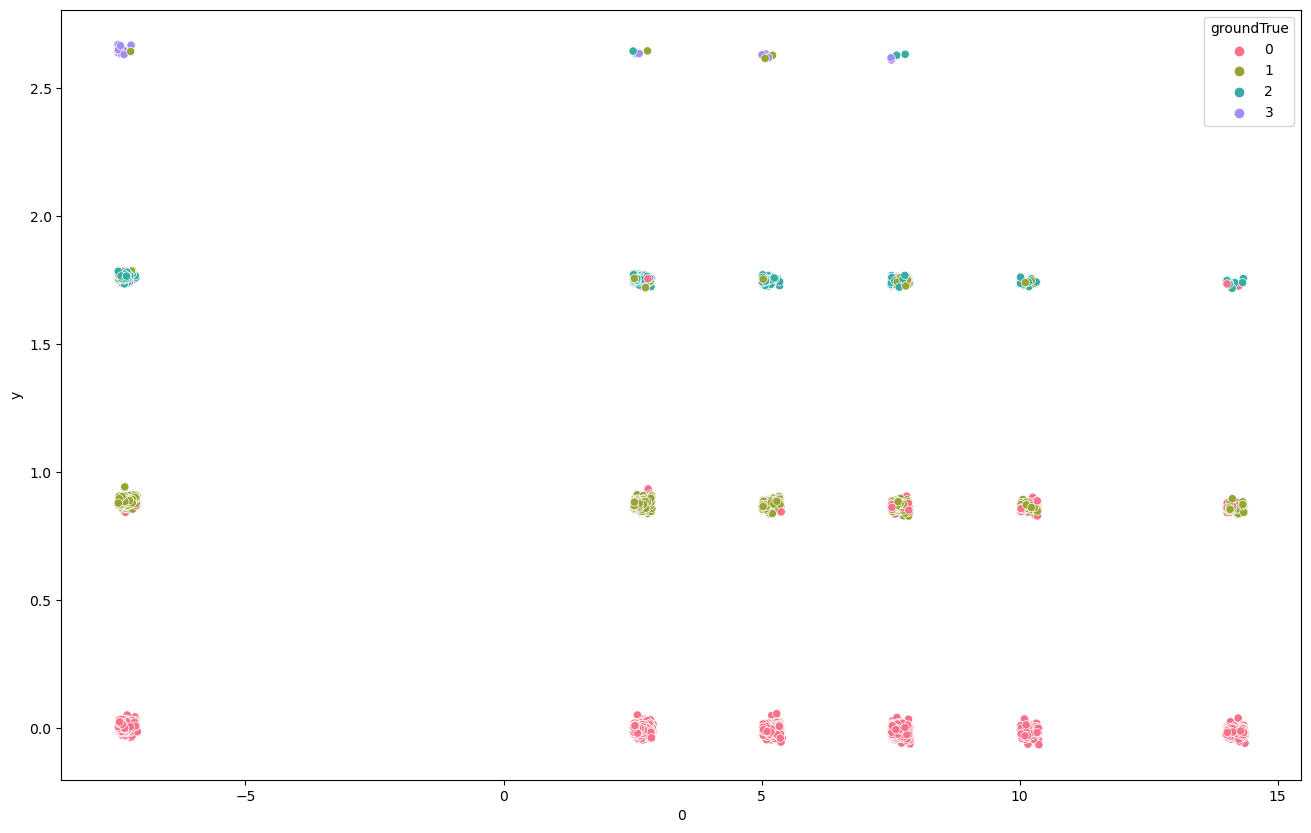

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("husl", 4),
    data=df,
    legend="full",
    alpha=1
)

In [53]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

In [60]:
pca = PCA(n_components=1)
pca_train_result = pca.fit_transform(x)

svm_reg = LinearSVR(epsilon=0, C = 10, random_state=42)
svm_reg.fit(pca_train_result, y)

pca_test_result = pca.transform(testX)
result = svm_reg.predict(pca_test_result)
print(mean_squared_error(result, testY))

svm_reg.support_ = find_support_vectors(svm_reg, pca_test_result, testY)

0.33661271866580017


/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [61]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)



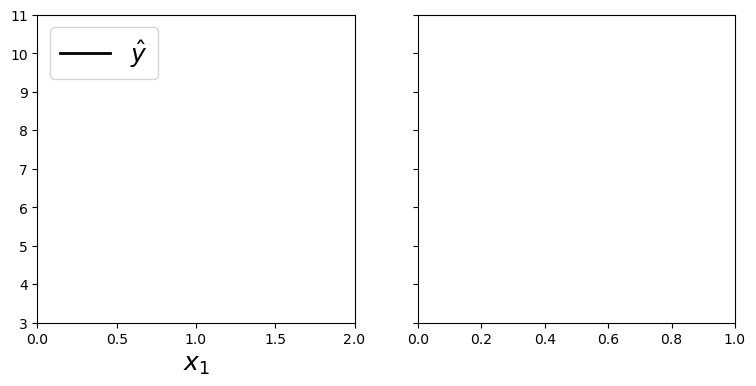

In [62]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, pca_test_result, testY, [])